<a href="https://colab.research.google.com/github/sangeetakar/New/blob/main/PCA_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import cv2

In [29]:
url="https://raw.githubusercontent.com/codeheroku/Introduction-to-Machine-Learning/master/Face%20Recognition%20Using%20PCA/face_data.csv" #Dont paste url directly ;Click on raw and then copy the link

In [30]:
#40 people with 10 images

In [31]:
##Helper functions. Use when needed.
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(15, 10, figsize=(14, 14),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

In [32]:
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(4, 8, figsize=(9, 6),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

In [33]:
def show_original_vs_reconstructed(original, reconstructed, n_samples=7):
    # Display original and reconstructed images side by side
    plt.figure(figsize=(12, 6))
    for i in range(n_samples):
        # Original Image
        plt.subplot(2, n_samples, i + 1)
        plt.imshow(original[i].reshape(64, 64), cmap='gray')
        plt.title(f'Original {i + 1}')
        plt.axis('off')

        # Reconstructed Image
        plt.subplot(2, n_samples, i + n_samples + 1)
        plt.imshow(reconstructed[i].reshape(64, 64), cmap='gray')
        plt.title(f'Reconstructed {i + 1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Step 1: Read dataset and visualize it.
**bold text**




In [34]:
df=pd.read_csv(url)
df.head()
#print(type(df))
#we have 64*64 image..after flattening we get 4096 parameters 0-black 1-white
#target represent different person; we have 10 images of same person

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [35]:
labels=df["target"]
print(labels)
#10 images of 40 different people

0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: target, Length: 400, dtype: int64


In [36]:
pixels=df.drop(["target"],axis=1)
#print(pixels)

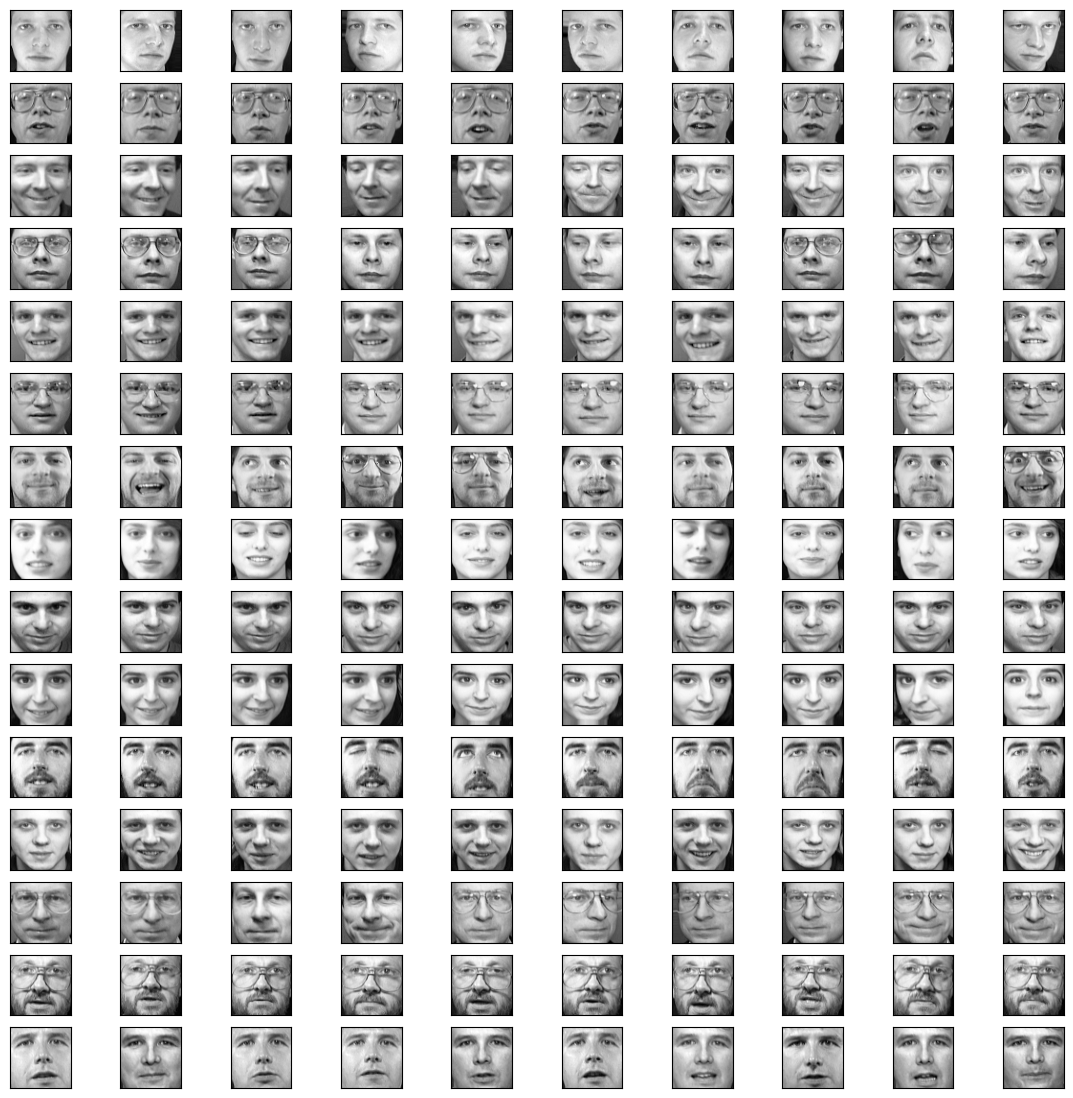

In [37]:
show_orignal_images(pixels)

# **Step 2: Split Dataset into training and testing**


In [38]:
x_train,x_test,y_train,y_test=train_test_split(pixels,labels) #x-pixels,y-labels

# *Step 3: Perform PCA*

See sickit learn documentation

In [39]:
pca=PCA(n_components=300).fit(x_train) #By trial and error we see that maximum number of componets is 300

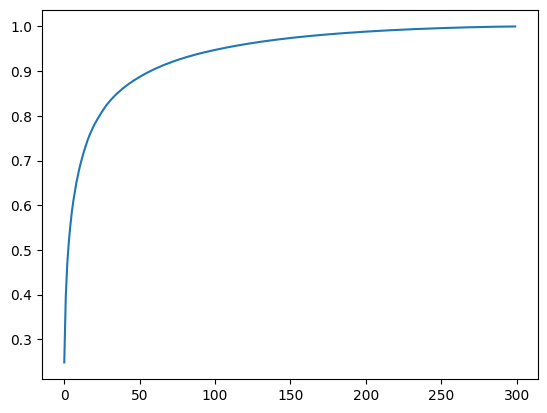

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #Variance of each eigen vector
#plt.plot(pca.explained_variance_ratio_)
plt.show()

Reduce number of components by seeing graph

In [41]:
val_y = np.cumsum(pca.explained_variance_ratio_)[134] #To see the percentage at a particular x_value so that we can take optimum no. of components
print(val_y)

0.9675300194145723


In [42]:
pca=PCA(n_components=135).fit(x_train) #reduving number of components

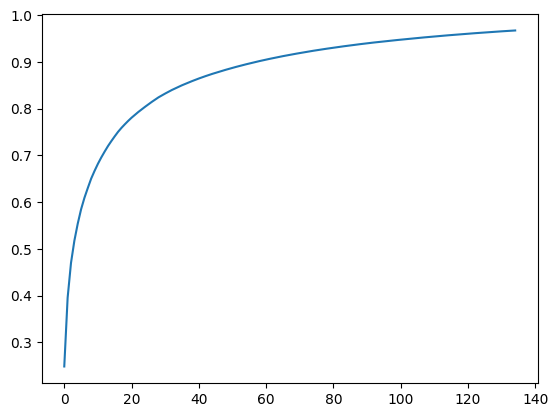

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.plot(pca.explained_variance_ratio_)
plt.show()

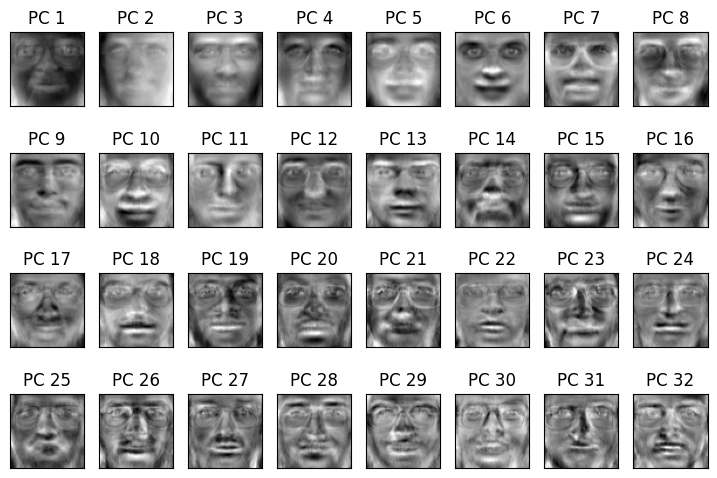

In [44]:
show_eigenfaces(pca) #eigen vectors/pricipal components capture the direction of max variance ,bright spot shows variance

# **Step 4: Project Training Data into PCA**

In [45]:
x_train_pca=pca.transform(x_train)

# **Step 5: Initialise Classifier and Fit Training Data**

---

:

In [46]:
#Using SVC(Support Vector) classifier
clf = SVC(kernel='rbf',C=1000,gamma=0.01)
clf = clf.fit(x_train_pca, y_train)


# **Step 6: Perform testing and get classification report**

In [47]:
print("\tPredicting people's names on the test set")

x_test_pca = pca.transform(x_test)
y_pred = clf.predict(x_test_pca)

cl=(classification_report(y_test, y_pred))
#print(cl)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

	Predicting people's names on the test set
0.8925887445887446
0.88


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
x_test_reconstructed = pca.inverse_transform(x_test_pca)


# **Reconstruction**

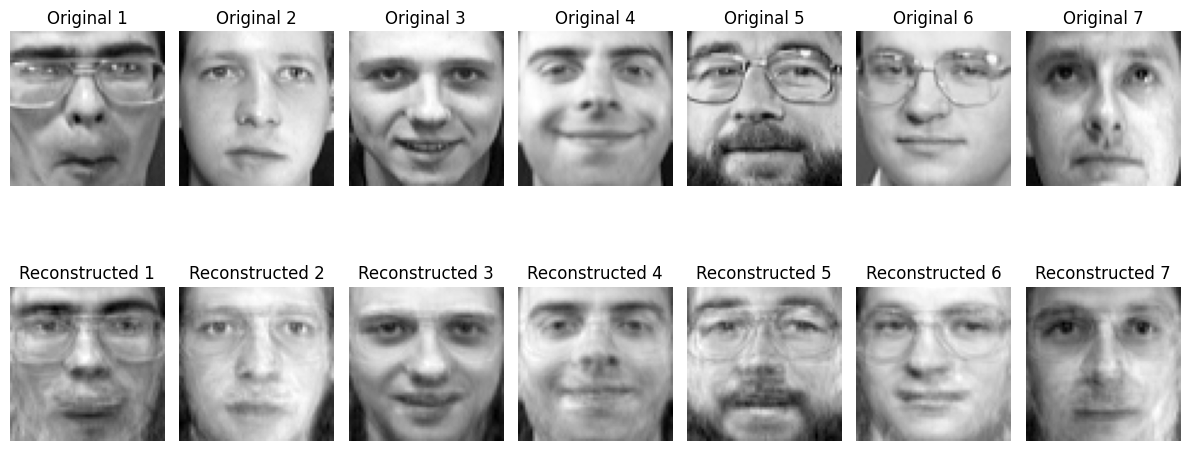

In [49]:
show_original_vs_reconstructed(x_test.values, x_test_reconstructed)


# **Code to get lists with values of accuracy,F1-score ,PSNR w.r.t. Number of PCA componenets**

In [ ]:
k=[] #no.of components
f=[] #f1-score =(precision+recall)/2
a=[] #accuracy
psn=[] #PSNR
for i in range (1,300):
  k.append(i)
  pca=PCA(n_components=i).fit(x_train)
  x_train_pca=pca.transform(x_train)
  clf = SVC(kernel='rbf',C=1000,gamma=0.01)
  clf = clf.fit(x_train_pca, y_train)
  x_test_pca = pca.transform(x_test)
  y_pred = clf.predict(x_test_pca)

  cl=(classification_report(y_test, y_pred))
  f1 = f1_score(y_test, y_pred, average='weighted')
  f.append(f1)
  accuracy = accuracy_score(y_test, y_pred)
  a.append(accuracy)
  x_test_reconstructed = pca.inverse_transform(x_test_pca)



  from sklearn.metrics import mean_squared_error

  def calculate_psnr(original, reconstructed):
      # Ensure images are of the same shape and type
      if original.shape != reconstructed.shape or original.dtype != reconstructed.dtype:
          raise ValueError("Images must have the same shape and dtype.")

      # Calculate mean squared error
      mse = mean_squared_error(original.flatten(), reconstructed.flatten())

      # If the MSE is zero, the images are identical, and PSNR is infinite
      if mse == 0:
          return float('inf')

      # Calculate PSNR using the formula: PSNR = 10 * log10(MAX^2 / MSE)
      max_pixel_value = np.max(reconstructed)
     # max_pixel_value = np.max(original)

      psnr_value = 10 * np.log10((max_pixel_value ** 2) / mse)

      return psnr_value

  # Assuming x_test and x_test_reconstructed are NumPy arrays representing the original and reconstructed images
  # Replace this with your actual data
  psnr_values = []

  for original, reconstructed in zip(x_test.values, x_test_reconstructed):
      psnr = calculate_psnr(original.reshape(64, 64), reconstructed.reshape(64, 64))
      psnr_values.append(psnr)

  average_psnr = np.mean(psnr_values)
  psn.append(average_psnr)







/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
plt.scatter(k, f, color='blue', marker='o', label='Data Points')

# Adding labels and title
plt.xlabel('No of Components (N)')
plt.ylabel('F1-Score')
plt.title('Scatter Plot of N against F1-Score')

# Displaying the legend (optional)
plt.legend()

# Display the plot
plt.show()

In [ ]:
#plt.scatter(k, a, color='green', marker='o', label='Data Points')
plt.plot(k, a, color='maroon', linestyle='-', marker='o', label='Connected Line')

# Adding labels and title
plt.xlabel('No. of PCA components')
plt.ylabel('Accuracy')
plt.title('No of PCA Components vs Accuracy ')
#plt.xlim(5,50)

# Displaying the legend (optional)
plt.legend()

# Display the plot
plt.show()

In [ ]:
'''plt.scatter(a, f, color='red', marker='o', label='Data Points')

# Adding labels and title
plt.xlabel('No. of PCA components')
plt.ylabel('F1-score')
plt.title('Scatter Plot of accuracy against f1-score')

# Displaying the legend (optional)
plt.legend()

# Display the plot
plt.show()'''

In [ ]:
plt.plot(k, psn, color='maroon', linestyle='-', marker='o', label='Connected Line')

# Adding labels and title
plt.xlabel('No. of PCA components')
plt.ylabel('PSNR')
plt.title('No of PCA Components vs PSNR ')
#plt.xlim(25,200)

# Displaying the legend (optional)
plt.legend()

# Display the plot
plt.show()

In [ ]:
print(psn[298])
print(psn[20])
print(psn[14])


print(a[50])
print(a[30])
print(a[18:30])
print(a[10:17])
print

In [ ]:
'''precision ,recall, f1-score say us about the accuracy of the model
we went down from 4096 features to 135 features and got decent accuracy
Precision- How much accurate \n
Recall-How many times accurate
Recall and Precision cannot be perfect simultaneously'''
''' F1=(precision +recall)/2'''

'precision ,recall, f1-score say us about the accuracy of the model\nwe went down from 4096 features to 135 features and got decent accuracy\nPrecision- How much accurate \n\nRecall-How many times accurate\nRecall and Precision cannot be perfect simultaneously'

In [ ]:

'''A Support Vector Machine (SVM) is a type of supervised machine learning algorithm that can be used for both classification and regression tasks.
The Support Vector Classification (SVC) is specifically designed for
 classification problems. SVMs are part of the broader family of machine learning algorithms used for pattern recognition and data analysis.

Here's a brief overview of how SVC works:

Input Data:

Given a set of training data points, each belonging to one of two classes (binary classification).
Feature Space:

Each data point is represented as a vector in a high-dimensional feature space. The number of dimensions is determined by the number of features in the input data.
Finding the Hyperplane:

The algorithm aims to find a hyperplane that best separates the data points of one class from another. This hyperplane is the decision boundary.
Support Vectors:

Support vectors are the data points that are closest to the hyperplane and are crucial for defining its position. These are the instances that
 contribute to the creation of the optimal hyperplane.
Optimization Objective:

The goal is to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data point from either class. This maximization
helps improve the model's generalization to new, unseen data.
Kernel Trick:

SVMs can use a kernel trick to transform the input space into a higher-dimensional space. This allows SVMs to handle non-linear decision boundaries in the original feature space.
SVC is particularly effective in high-dimensional spaces and is widely used in various applications, including image classification, text classification, and bioinformatics. It's
important to note that SVMs, including SVC, are sensitive to the choice of hyperparameters and may require careful tuning for optimal performance.'''

"A Support Vector Machine (SVM) is a type of supervised machine learning algorithm that can be used for both classification and regression tasks.\nThe Support Vector Classification (SVC) is specifically designed for\n classification problems. SVMs are part of the broader family of machine learning algorithms used for pattern recognition and data analysis.\n\nHere's a brief overview of how SVC works:\n\nInput Data:\n\nGiven a set of training data points, each belonging to one of two classes (binary classification).\nFeature Space:\n\nEach data point is represented as a vector in a high-dimensional feature space. The number of dimensions is determined by the number of features in the input data.\nFinding the Hyperplane:\n\nThe algorithm aims to find a hyperplane that best separates the data points of one class from another. This hyperplane is the decision boundary.\nSupport Vectors:\n\nSupport vectors are the data points that are closest to the hyperplane and are crucial for defining its